In [12]:
# imporitng Libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt


In [13]:
#reading images
img = cv2.imread('elephant.jpg')



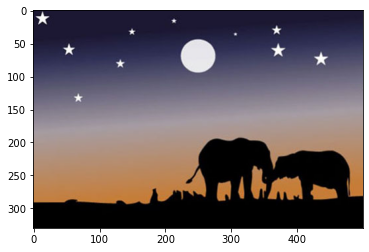

In [14]:
#converting images from bgr to rgb
img= cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
original_img = img
plt.imshow(img)
plt.show()

In [15]:
#printing image shape

print(img.shape)

(330, 500, 3)


In [33]:
#flatten each channel of the image in a linear array
all_pixels=img.reshape((330*500,3))
print(all_pixels.shape)
print(all_pixels)

(165000, 3)
[[23 19 46]
 [25 21 48]
 [28 24 51]
 ...
 [ 0  0  0]
 [ 0  0  0]
 [ 0  0  0]]


In [34]:
#importing k_means from scikit learn
from sklearn.cluster import KMeans

In [35]:
#finding dominant colors

dominant_colors =4

km = KMeans(n_clusters=dominant_colors)
km.fit(all_pixels)
centers = km.cluster_centers_
centers = np.array(centers,dtype= 'uint8')
print(centers)

[[175 145 128]
 [  1   0   1]
 [ 99  95 118]
 [ 38  35  64]]


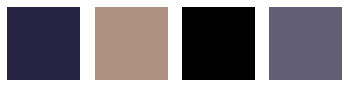

In [19]:
#plotting the color of the above centers
i=1
colors= []
for each_col in centers:
    plt.subplot(1,4,i)
    plt.axis('off')
    i+=1
    colors.append(each_col)
    #colors switch
    a = np.zeros((100,100,3),dtype = 'uint8')
    a[:,:,:] = each_col
    plt.imshow(a)
plt.show()

In [42]:
#segmenting our original image
new_img = np.zeros((330*500,3),dtype = 'uint8')
print(new_img.shape)

(165000, 3)


In [43]:
#printing the label and its size
a= km.labels_

for ix in range(new_img.shape[0]):
    new_img[ix]= colors[km.labels_[ix]]
new_img = new_img.reshape((original_img.shape))

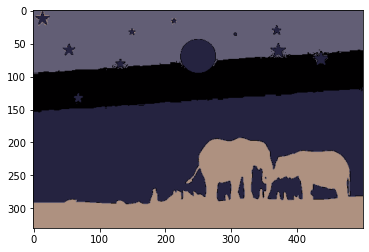

In [44]:
#plotting the new images
plt.imshow(new_img)
plt.show()
